# Objetivo del proyecto: Definir un Business Case

##### Problem statement: Determinar en qué localidad conviene instalar una empresa de excursiones con tiburones.
##### Hipotesis: Buceo con tiburones en Bahamas

Plan:
1. Limpiar datos (5 técnicas de limpieza) y transformar datos (poner en el mismo formato)
 - Limpiar null values
 - Quitar duplicados
 - Manipular strings
 - Fechas en mismo formato
 - Preparar dataset para análisis (EDA)

2. Redex

In [3]:
import numpy as np
import pandas as pd

# Para leer un excel hay que instalar pip install xlrd>=2.0.1 desde la terminal e indicar que lea read_excel
shark_df = pd.read_excel("C:/Users/dalmi/Documents/España/Data Analytics - IronHack/Quests/Quest_2_Sharks/GSAF5.xls")
shark_df

Date    Year        Type             Country  \
0                     NaN     NaN         NaN                 NaN   
1                       y     NaN         NaN                 NaN   
2                       x     NaN         NaN                 NaN   
3     2024-09-16 00:00:00  2024.0  Unprovoked             Morocco   
4     2024-08-26 00:00:00  2024.0  Unprovoked             Jamaica   
...                   ...     ...         ...                 ...   
6968          Before 1903     0.0  Unprovoked           AUSTRALIA   
6969          Before 1903     0.0  Unprovoked           AUSTRALIA   
6970            1900-1905     0.0  Unprovoked                 USA   
6971            1883-1889     0.0  Unprovoked              PANAMA   
6972            1845-1853     0.0  Unprovoked  CEYLON (SRI LANKA)   

                  State                             Location  \
0                   NaN                                  NaN   
1                   NaN                                  NaN   
2                   NaN                                  NaN   
3      Southern Morocco                       West of Dakhla   
4           Montego Bay                             Falmouth   
...                 ...                                  ...   
6968  Western Australia                          Roebuck Bay   
6969  Western Australia                                  NaN   
6970     North Carolina                       Ocracoke Inlet   
6971                NaN                 Panama Bay 8ºN, 79ºW   
6972   Eastern Province  Below the English fort, Trincomalee   

                         Activity                   Name  Sex  Age  ...  \
0                             NaN                    NaN  NaN  NaN  ...   
1                             NaN                    NaN  NaN  NaN  ...   
2                             NaN                    NaN  NaN  NaN  ...   
3     Swimming - jumped off yacht         German Tourist    F   30  ...   
4                    Spearfishing           Jahmari Reid    M   16  ...   
...                           ...                    ...  ...  ...  ...   
6968                       Diving                   male    M  NaN  ...   
6969                 Pearl diving                  Ahmun    M  NaN  ...   
6970                     Swimming  Coast Guard personnel    M  NaN  ...   
6971                          NaN        Jules Patterson    M  NaN  ...   
6972                     Swimming                   male    M   15  ...   

                      Species   \
0                          NaN   
1                          NaN   
2                          NaN   
3     Reportedly a Great White   
4       Reportedly Tiger Shark   
...                        ...   
6968                       NaN   
6969                       NaN   
6970                       NaN   
6971                       NaN   
6972                       NaN   

                                                Source  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3           Andy Currie: Moroccan World News: Sky News   
4     Todd Smith: Daily Mail UK: Sky News: People .com   
...                                                ...   
6968                  H. Taunton; N. Bartlett,  p. 234   
6969             H. Taunton; N. Bartlett,  pp. 233-234   
6970              F. Schwartz, p.23; C. Creswell, GSAF   
6971                               The Sun, 10/20/1938   
6972                                        S.W. Baker   

                                 pdf  \
0                                NaN   
1                                NaN   
2                                NaN   
3                                NaN   
4                                NaN   
...                              ...   
6968          ND-0005-RoebuckBay.pdf   
6969               ND-0004-Ahmun.pdf   
6970  ND-0003-Ocracoke_1900-1905.pdf   
6971      ND-000

Examine the data and try to understand what the fields mean before proceeding with data cleaning and manipulation.

In [5]:
shark_df.shape

(6973, 23)

In [7]:
shark_df.Country.value_counts()

Country
USA                   2550
AUSTRALIA             1481
SOUTH AFRICA           597
NEW ZEALAND            144
BAHAMAS                136
                      ... 
EGYPT / ISRAEL           1
Jamaica                  1
MEXICO                   1
Seychelles               1
CEYLON (SRI LANKA)       1
Name: count, Length: 234, dtype: int64

In [9]:
shark_df.T

0    1    2                                           3     \
Date            NaN    y    x                         2024-09-16 00:00:00   
Year            NaN  NaN  NaN                                      2024.0   
Type            NaN  NaN  NaN                                  Unprovoked   
Country         NaN  NaN  NaN                                     Morocco   
State           NaN  NaN  NaN                            Southern Morocco   
Location        NaN  NaN  NaN                              West of Dakhla   
Activity        NaN  NaN  NaN                 Swimming - jumped off yacht   
Name            NaN  NaN  NaN                              German Tourist   
Sex             NaN  NaN  NaN                                           F   
Age             NaN  NaN  NaN                                          30   
Injury          NaN  NaN  NaN                                 Leg severed   
Unnamed: 11     NaN  NaN  NaN                                           Y   
Time            NaN  NaN  NaN                                      1600hr   
Species         NaN  NaN  NaN                    Reportedly a Great White   
Source          NaN  NaN  NaN  Andy Currie: Moroccan World News: Sky News   
pdf             NaN  NaN  NaN                                         NaN   
href formula    NaN  NaN  NaN                                         NaN   
href            NaN  NaN  NaN                                         NaN   
Case Number     NaN  NaN  NaN                                         NaN   
Case Number.1   NaN  NaN  NaN                                         NaN   
original order  NaN  NaN  NaN                                         NaN   
Unnamed: 21     NaN  NaN  NaN                                         NaN   
Unnamed: 22     NaN  NaN  NaN                                         NaN   

                                                            4     \
Date                                         2024-08-26 00:00:00   
Year                                                      2024.0   
Type                                                  Unprovoked   
Country                                                  Jamaica   
State                                                Montego Bay   
Location                                                Falmouth   
Activity                                            Spearfishing   
Name                                                Jahmari Reid   
Sex                                                            M   
Age                                                           16   
Injury                            Head right arm and leg severed   
Unnamed: 11                                                    Y   
Time                                                         NaN   
Species                                   Reportedly Tiger Shark   
Source          Todd Smith: Daily Mail UK: Sky News: People .com   
pdf                                                          NaN   
href formula                                                 NaN   
href                                                         NaN   
Case Number                                                  NaN   
Case Number.1                                                NaN   
original order                                               NaN   
Unnamed: 21                                                  NaN   
Unnamed: 22                                                  NaN   

                                                             5     \
Date                                          2024-08-06 00:00:00   
Year                                                       2024.0   
Type                                                   Unprovoked   
Country                                                    Belize   
State                                            Gulf of Honduras   
Location                                          Central America   
Activity                                       Swi

Una vez tenemos las columnas traspuestas para poder ver la información contenida en cada una de ellas, sacamos las principales conclusiones:

- La primera columna (Date), da información del día, mes y año en el que se produjo el ataque de tiburón. Es interesante quedarnos con las épocas del año (quitar día, agrupar meses por primera, verano, otoño e invierno)

- La segunda columna (Year), da información del año en el que se produjo el ataque del tiburón. Esta información es redundante con la que da la primera columna. Se puede eliminar.

- La tercera columna (Type), da información sobre si el ataque fue provocado o no. La dejamos para tener información sobre la agresividad del tiburón.

- La cuarta columna (Country), da información sobre el país en el que ocurrió. La dejaremos para poder entender dónde montar el negocio. Esta columna la eliminaremos, por ser información muy general.

- La quinta columna (State) va fuera.

- La sexta columna (Location) es con la que trabajaremos para poder entender la recurrencia de los ataques de los tiburones y poder desarrollar el negocio en base a esto.

- La septima columna (Activity) es importante para entender qué actividad provoca menos ataques de tiburón.

- La octava columna, novena y decima (Name, Sex, Age) van fuera.

- La columna 12 (Injury) es importante para entender la agresividad del ataque de tiburón.

- La columna 13 la eliminamos, ya que no tiene información.

- ** La columna 14 (Time) la dejamos para analizarla y ver si es importante para nuestro negocio.

- La columna 15 (Species) es importante para conocer la agresividad del tiburón.

- La columna de Source no da información relevante para entender / prevenir los ataques de tiburón, por lo que podría eliminarse también.

- Las ultimas 8 columnas (pdf, href formula, href, Case Number, Case Number.1, original order, Unnamedb21 y Unnamed:22 no contienen datos importantes, por lo que sería conveniente eliminarlas.

In [12]:
shark_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6973 entries, 0 to 6972
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6972 non-null   object 
 1   Year            6968 non-null   float64
 2   Type            6952 non-null   object 
 3   Country         6920 non-null   object 
 4   State           6488 non-null   object 
 5   Location        6405 non-null   object 
 6   Activity        6384 non-null   object 
 7   Name            6750 non-null   object 
 8   Sex             6391 non-null   object 
 9   Age             3975 non-null   object 
 10  Injury          6935 non-null   object 
 11  Unnamed: 11     6408 non-null   object 
 12  Time            3443 non-null   object 
 13  Species         3838 non-null   object 
 14  Source          6951 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

In [14]:
shark_df.describe()

Year  original order
count  6968.000000     6799.000000
mean   1934.737945     3401.152081
std     272.466097     1963.076319
min       0.000000        2.000000
25%    1947.000000     1701.500000
50%    1985.000000     3401.000000
75%    2009.000000     5100.500000
max    2026.000000     6802.000000



- La segunda columna (Year)
  
- La quinta columna (State)

- La octava columna, novena y decima (Name, Sex, Age) van fuera.

- La columna 13 la eliminamos, ya que no tiene información.

- Las ultimas 8 columnas (pdf, href formula, href, Case Number, Case Number.1, original order, Unnamedb21 y Unnamed:22 no contienen datos importantes, por lo que sería conveniente eliminarlas.

In [17]:
shark_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6973 entries, 0 to 6972
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6972 non-null   object 
 1   Year            6968 non-null   float64
 2   Type            6952 non-null   object 
 3   Country         6920 non-null   object 
 4   State           6488 non-null   object 
 5   Location        6405 non-null   object 
 6   Activity        6384 non-null   object 
 7   Name            6750 non-null   object 
 8   Sex             6391 non-null   object 
 9   Age             3975 non-null   object 
 10  Injury          6935 non-null   object 
 11  Unnamed: 11     6408 non-null   object 
 12  Time            3443 non-null   object 
 13  Species         3838 non-null   object 
 14  Source          6951 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

In [18]:
shark_clean_1_df= shark_df.drop(columns = ["Year","State","Name","Sex","Age","Unnamed: 11","Time","Source","pdf","href formula","href","Case Number","Case Number.1","original order", "Unnamed: 21","Unnamed: 22"])

In [19]:
shark_clean_1_df

Date        Type             Country  \
0                     NaN         NaN                 NaN   
1                       y         NaN                 NaN   
2                       x         NaN                 NaN   
3     2024-09-16 00:00:00  Unprovoked             Morocco   
4     2024-08-26 00:00:00  Unprovoked             Jamaica   
...                   ...         ...                 ...   
6968          Before 1903  Unprovoked           AUSTRALIA   
6969          Before 1903  Unprovoked           AUSTRALIA   
6970            1900-1905  Unprovoked                 USA   
6971            1883-1889  Unprovoked              PANAMA   
6972            1845-1853  Unprovoked  CEYLON (SRI LANKA)   

                                 Location                     Activity  \
0                                     NaN                          NaN   
1                                     NaN                          NaN   
2                                     NaN                          NaN   
3                          West of Dakhla  Swimming - jumped off yacht   
4                                Falmouth                 Spearfishing   
...                                   ...                          ...   
6968                          Roebuck Bay                       Diving   
6969                                  NaN                 Pearl diving   
6970                       Ocracoke Inlet                     Swimming   
6971                 Panama Bay 8ºN, 79ºW                          NaN   
6972  Below the English fort, Trincomalee                     Swimming   

                                                 Injury  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                           Leg severed   
4                        Head right arm and leg severed   
...                                                 ...   
6968                                              FATAL   
6969                                              FATAL   
6970                                              FATAL   
6971                                              FATAL   
6972  FATAL. "Shark bit him in half, carrying away t...   

                      Species   
0                          NaN  
1                          NaN  
2                          NaN  
3     Reportedly a Great White  
4       Reportedly Tiger Shark  
...                        ...  
6968                       NaN  
6969                       NaN  
6970                       NaN  
6971                       NaN  
6972                       NaN  

[6973 rows x 7 columns]

In [23]:
shark_clean_1_df.value_counts("Type")

Type
Unprovoked             5132
Provoked                636
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Boat                      7
 Provoked                 2
?                         1
Unconfirmed               1
Under investigation       1
Unverified                1
Name: count, dtype: int64

In [25]:
# Primero copiamos todo el dataframe
shark_2_df = shark_clean_1_df.copy()

# Limpiamos los espacios de los titulos y los ponemos en mayusculas
shark_2_df.columns = [column.lower().replace(" ","") for column in shark_clean_1_df.columns]
shark_2_df

date        type             country  \
0                     NaN         NaN                 NaN   
1                       y         NaN                 NaN   
2                       x         NaN                 NaN   
3     2024-09-16 00:00:00  Unprovoked             Morocco   
4     2024-08-26 00:00:00  Unprovoked             Jamaica   
...                   ...         ...                 ...   
6968          Before 1903  Unprovoked           AUSTRALIA   
6969          Before 1903  Unprovoked           AUSTRALIA   
6970            1900-1905  Unprovoked                 USA   
6971            1883-1889  Unprovoked              PANAMA   
6972            1845-1853  Unprovoked  CEYLON (SRI LANKA)   

                                 location                     activity  \
0                                     NaN                          NaN   
1                                     NaN                          NaN   
2                                     NaN                          NaN   
3                          West of Dakhla  Swimming - jumped off yacht   
4                                Falmouth                 Spearfishing   
...                                   ...                          ...   
6968                          Roebuck Bay                       Diving   
6969                                  NaN                 Pearl diving   
6970                       Ocracoke Inlet                     Swimming   
6971                 Panama Bay 8ºN, 79ºW                          NaN   
6972  Below the English fort, Trincomalee                     Swimming   

                                                 injury  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                           Leg severed   
4                        Head right arm and leg severed   
...                                                 ...   
6968                                              FATAL   
6969                                              FATAL   
6970                                              FATAL   
6971                                              FATAL   
6972  FATAL. "Shark bit him in half, carrying away t...   

                       species  
0                          NaN  
1                          NaN  
2                          NaN  
3     Reportedly a Great White  
4       Reportedly Tiger Shark  
...                        ...  
6968                       NaN  
6969                       NaN  
6970                       NaN  
6971                       NaN  
6972                       NaN  

[6973 rows x 7 columns]

# Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. 

In [27]:
shark_2_df["country"].nunique()

234

In [29]:
shark_2_df['country'] = shark_2_df['country'].str.lower().str.strip()
shark_2_df["country"].nunique()

210

In [31]:
shark_2_df["country"].unique()

array([nan, 'morocco', 'jamaica', 'belize', 'australia', 'usa',
       'maldive islands', 'turks and caicos', 'french polynesia',
       'tobago', 'bahamas', 'india', 'trinidad', 'south africa', 'mexico',
       'new zealand', 'egypt', 'philippines', 'coral sea', 'spain',
       'portugal', 'samoa', 'colombia', 'ecuador', 'new caledonia',
       'cuba', 'brazil', 'seychelles', 'argentina', 'fiji', 'maldives',
       'england', 'japan', 'indonesia', 'thailand', 'columbia',
       'costa rica', 'british overseas territory', 'canada', 'jordan',
       'st kitts / nevis', 'st martin', 'papua new guinea',
       'reunion island', 'israel', 'china', 'ireland', 'italy',
       'malaysia', 'libya', 'mauritius', 'solomon islands',
       'st helena, british overseas territory', 'comoros', 'reunion',
       'united kingdom', 'united arab emirates', 'cape verde',
       'dominican republic', 'cayman islands', 'aruba', 'mozambique',
       'puerto rico', 'atlantic ocean', 'greece', 'st. martin', '

In [33]:
countries_dictionary = {
    'usa': 'united states',
    'america': 'united states',
    'mexico': 'mexico',
    'belize': 'belize',
    'australia': 'australia',
    'au': 'australia',
    'maldives': 'maldives',
    'maldiveislands': 'maldives',
    'turksandcaicos': 'turks and caicos',
    'turks&caicos': 'turks and caicos',
    'turksandcaicos': 'turks and caicos',
    'turksandcaicos': 'turks and caicos',
    'frenchpolynesia': 'french polynesia',
    'french polynesia': 'french polynesia',
    'southafrica': 'south africa',
    'south africa': 'south africa',
    'newzealand': 'new zealand',
    'new zealand': 'new zealand',
    'trinidad': 'trinidad and tobago',
    'trinidad&tobago': 'trinidad and tobago',
    'tobago': 'trinidad and tobago',
    'bahamas': 'bahamas',
    'columbia': 'colombia',
    'costa rica': 'costa rica',
    'jamaica': 'jamaica',
    'ecuador': 'ecuador',
    'spain': 'spain',
    'portugal': 'portugal',
    'samoa': 'samoa',
    'colombia': 'colombia',
    'fiji': 'fiji',
    'coralsea': 'coral sea',
    'philippines': 'philippines',
    'brazil': 'brazil',
    'seychelles': 'seychelles',
    'argentina': 'argentina',
    'england': 'united kingdom',
    'uk': 'united kingdom',
    'unitedkingdom': 'united kingdom',
    'newcaledonia': 'new caledonia',
    'malaysia': 'malaysia',
    'france': 'france',
    'egypt': 'egypt',
    'thailand': 'thailand',
    'indonesia': 'indonesia',
    'china': 'china',
    'italy': 'italy',
    'japan': 'japan',
    'canada': 'canada',
    'jordan': 'jordan',
    'st kitts/nevis': 'st kitts and nevis',
    'stkitts/nevis': 'st kitts and nevis',
    'stmartin': 'st martin',
    'st.maarten': 'st martin',
    'papuanewguinea': 'papua new guinea',
    'reunion': 'reunion',
    'reunionisland': 'reunion',
    'israel': 'israel',
    'india': 'india',
    'italy/croatia': 'italy',
    'sthelena,britishoverseasterritory': 'st helena',
    'britishoverseasterritory': 'united kingdom',
    'scotland': 'united kingdom',
    'wales': 'united kingdom',
    'northernireland': 'united kingdom',
    'dominicanrepublic': 'dominican republic',
    'puertorico': 'puerto rico',
    'jamaica': 'jamaica',
    'falklandislands': 'falkland islands',
    'marshallislands': 'marshall islands',
    'marshall': 'marshall islands',
    'solomonislands': 'solomon islands',
    'britishvirginislands': 'british virgin islands',
    'virginislands': 'british virgin islands',
    'bvi': 'british virgin islands',
    'caymanislands': 'cayman islands',
    'grandcayman': 'cayman islands',
    'american samoa': 'american samoa',
    'micronesia': 'micronesia',
    'srilanka': 'sri lanka',
    'ceylon': 'sri lanka',
    'south korea': 'south korea',
    'southkorea': 'south korea',
    'north korea': 'north korea',
    'northkorea': 'north korea',
    'malta': 'malta',
    'vietnam': 'vietnam',
    'madagascar': 'madagascar',
    'panama': 'panama',
    'somalia': 'somalia',
    'libya': 'libya',
    'iran': 'iran',
    'iraq': 'iraq',
    'iran/iraq': 'iran',
    'nigeria': 'nigeria',
    'greece': 'greece',
    'portugal': 'portugal',
    'chile': 'chile',
    'peru': 'peru',
    'kenya': 'kenya',
    'russia': 'russia',
    'venezuela': 'venezuela',
    'uruguay': 'uruguay',
    'guam': 'guam',
    'ghana': 'ghana',
    'djibouti': 'djibouti',
    'sudan': 'sudan',
    'sudan?': 'sudan',
    'bangladesh': 'bangladesh',
    'new britain': 'new britain',
    'pacificocean': 'pacific ocean',
    'southpacificocean': 'south pacific ocean',
    'northpacificocean': 'north pacific ocean',
    'indianocean': 'indian ocean',
    'redsea': 'red sea',
    'mediterraneansea': 'mediterranean sea',
    'caribbeansea': 'caribbean sea',
    'gulf of aden': 'gulf of aden',
    'persiangulf': 'persian gulf',
    'northatlantic': 'north atlantic ocean',
    'midatlantic': 'mid atlantic ocean',
    'northsea': 'north sea',
    'tasmansea': 'tasman sea',
    'englishchannel': 'english channel',
    'persiangulf': 'persian gulf',
    'antarctica': 'antarctica',
    'cyprus': 'cyprus',
    'mauritius': 'mauritius',
    'mongolia': 'mongolia',
    'jordan': 'jordan',
    'kuwait': 'kuwait',
    'new guinea': 'new guinea',
    'algeria': 'algeria',
    'yemen': 'yemen',
    'singapore': 'singapore',
    'kuwait': 'kuwait',
    'burma': 'myanmar',
    'myanmar': 'myanmar',
    'britishwestindies': 'british west indies',
    'cuba': 'cuba',
    'pakistan': 'pakistan',
    'sweden': 'sweden',
    'norway': 'norway',
    'ireland': 'ireland',
    'britishisles': 'united kingdom',
    'kyrgyzstan': 'kyrgyzstan',
    'taiwan': 'taiwan',
    'lebanon': 'lebanon',
    'georgia': 'georgia',
    'croatia': 'croatia',
    'slovenia': 'slovenia',
    'serbia': 'serbia',
    'north macedonia': 'north macedonia',
    'comoros': 'comoros',
    'vanuatu': 'vanuatu',
    'guatemala': 'guatemala',
    'honduras': 'honduras',
    'philippines': 'philippines',
    'mid-pacificocean': 'mid-pacific ocean',
    'israel': 'israel',
    'hongkong': 'hong kong',
    'taiwan': 'taiwan',
    'china': 'china',
    'liberia': 'liberia',
    'gabon': 'gabon',
    'gambia': 'gambia',
    'singapore': 'singapore',
    'burma': 'myanmar',
    'macao': 'macao',
    'cayman islands': 'cayman islands',
    'morocco': 'morocco',
    'jamaica': 'jamaica',
    'belize': 'belize',
    'australia': 'australia',
    'usa': 'united states',
    'america': 'united states',
    'maldiveislands': 'maldives',
    'maldives': 'maldives',
    'turksandcaicos': 'turks and caicos',
    'turks&caicos': 'turks and caicos',
    'frenchpolynesia': 'french polynesia',
    'french polynesia': 'french polynesia',
    'tobago': 'trinidad and tobago',
    'trinidad': 'trinidad and tobago',
    'trinidad&tobago': 'trinidad and tobago',
    'bahamas': 'bahamas',
    'india': 'india',
    'southafrica': 'south africa',
    'south africa': 'south africa',
    'mexico': 'mexico',
    'newzealand': 'new zealand',
    'new zealand': 'new zealand',
    'egypt': 'egypt',
    'philippines': 'philippines',
    'coralsea': 'coral sea',
    'spain': 'spain',
    'portugal': 'portugal',
    'samoa': 'samoa',
    'colombia': 'colombia',
    'columbia': 'colombia',
    'ecuador': 'ecuador',
    'newcaledonia': 'new caledonia',
    'cuba': 'cuba',
    'brazil': 'brazil',
    'seychelles': 'seychelles',
    'argentina': 'argentina',
    'fiji': 'fiji',
    'england': 'united kingdom',
    'uk': 'united kingdom',
    'unitedkingdom': 'united kingdom',
    'japan': 'japan',
    'indonesia': 'indonesia',
    'thailand': 'thailand',
    'costarica': 'costa rica',
    'costa rica': 'costa rica',
    'britishoverseasterritory': 'united kingdom',
    'stkitts/nevis': 'st kitts and nevis',
    'stmartin': 'st martin',
    'st.maarten': 'st martin',
    'papuanewguinea': 'papua new guinea',
    'reunionisland': 'reunion',
    'reunion': 'reunion',
    'israel': 'israel',
    'china': 'china',
    'ireland': 'ireland',
    'italy': 'italy',
    'italy/croatia': 'italy',
    'malaysia': 'malaysia',
    'libya': 'libya',
    'mauritius': 'mauritius',
    'solomonislands': 'solomon islands',
    'solomon islands': 'solomon islands',
    'sthelena,britishoverseasterritory': 'st helena',
    'comoros': 'comoros',
    'unitedarabemirates': 'united arab emirates',
    'unitedarabemirates(uae)': 'united arab emirates',
    'uae': 'united arab emirates',
    'capeverde': 'cape verde',
    'dominicanrepublic': 'dominican republic',
    'puertorico': 'puerto rico',
    'caymanislands': 'cayman islands',
    'grandcayman': 'cayman islands',
    'aruba': 'aruba',
    'mozambique': 'mozambique',
    'atlanticocean': 'atlantic ocean',
    'greece': 'greece',
    'st.martin': 'st martin',
    'france': 'france',
    'kiribati': 'kiribati',
    'diegogarcia': 'diego garcia',
    'taiwan': 'taiwan',
    'palestinianterritories': 'palestinian territories',
    'guam': 'guam',
    'nigeria': 'nigeria',
    'tonga': 'tonga',
    'scotland': 'united kingdom',
    'croatia': 'croatia',
    'saudiarabia': 'saudi arabia',
    'chile': 'chile',
    'antigua': 'antigua and barbuda',
    'kenya': 'kenya',
    'russia': 'russia',
    'azores': 'azores',
    'southkorea': 'south korea',
    'malta': 'malta',
    'vietnam': 'vietnam'}

In [35]:
shark_3_df = shark_2_df.copy()
shark_3_df['country'] = shark_3_df['country'].replace(countries_dictionary)

# Mostrar el DataFrame limpio
print(shark_3_df['country'].nunique())

204


In [37]:
# Primero miramos los valores nulos 
shark_3_df.isnull().sum()

date           1
type          21
country       53
location     568
activity     589
injury        38
species     3135
dtype: int64

In [39]:
shark_3_df.shape

(6973, 7)

In [41]:
shark_3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6973 entries, 0 to 6972
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      6972 non-null   object
 1   type      6952 non-null   object
 2   country   6920 non-null   object
 3   location  6405 non-null   object
 4   activity  6384 non-null   object
 5   injury    6935 non-null   object
 6   species   3838 non-null   object
dtypes: object(7)
memory usage: 381.5+ KB


In [43]:
shark_3_df

date        type             country  \
0                     NaN         NaN                 NaN   
1                       y         NaN                 NaN   
2                       x         NaN                 NaN   
3     2024-09-16 00:00:00  Unprovoked             morocco   
4     2024-08-26 00:00:00  Unprovoked             jamaica   
...                   ...         ...                 ...   
6968          Before 1903  Unprovoked           australia   
6969          Before 1903  Unprovoked           australia   
6970            1900-1905  Unprovoked       united states   
6971            1883-1889  Unprovoked              panama   
6972            1845-1853  Unprovoked  ceylon (sri lanka)   

                                 location                     activity  \
0                                     NaN                          NaN   
1                                     NaN                          NaN   
2                                     NaN                          NaN   
3                          West of Dakhla  Swimming - jumped off yacht   
4                                Falmouth                 Spearfishing   
...                                   ...                          ...   
6968                          Roebuck Bay                       Diving   
6969                                  NaN                 Pearl diving   
6970                       Ocracoke Inlet                     Swimming   
6971                 Panama Bay 8ºN, 79ºW                          NaN   
6972  Below the English fort, Trincomalee                     Swimming   

                                                 injury  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                           Leg severed   
4                        Head right arm and leg severed   
...                                                 ...   
6968                                              FATAL   
6969                                              FATAL   
6970                                              FATAL   
6971                                              FATAL   
6972  FATAL. "Shark bit him in half, carrying away t...   

                       species  
0                          NaN  
1                          NaN  
2                          NaN  
3     Reportedly a Great White  
4       Reportedly Tiger Shark  
...                        ...  
6968                       NaN  
6969                       NaN  
6970                       NaN  
6971                       NaN  
6972                       NaN  

[6973 rows x 7 columns]

In [45]:
shark_4_df=shark_3_df.copy()
shark_4_df=shark_4_df.dropna(how="all")

In [47]:
shark_4_df

date        type             country  \
1                       y         NaN                 NaN   
2                       x         NaN                 NaN   
3     2024-09-16 00:00:00  Unprovoked             morocco   
4     2024-08-26 00:00:00  Unprovoked             jamaica   
5     2024-08-06 00:00:00  Unprovoked              belize   
...                   ...         ...                 ...   
6968          Before 1903  Unprovoked           australia   
6969          Before 1903  Unprovoked           australia   
6970            1900-1905  Unprovoked       united states   
6971            1883-1889  Unprovoked              panama   
6972            1845-1853  Unprovoked  ceylon (sri lanka)   

                                 location                     activity  \
1                                     NaN                          NaN   
2                                     NaN                          NaN   
3                          West of Dakhla  Swimming - jumped off yacht   
4                                Falmouth                 Spearfishing   
5                         Central America           Swimming - Diving    
...                                   ...                          ...   
6968                          Roebuck Bay                       Diving   
6969                                  NaN                 Pearl diving   
6970                       Ocracoke Inlet                     Swimming   
6971                 Panama Bay 8ºN, 79ºW                          NaN   
6972  Below the English fort, Trincomalee                     Swimming   

                                                 injury  \
1                                                   NaN   
2                                                   NaN   
3                                           Leg severed   
4                        Head right arm and leg severed   
5          Right lower leg amputated after serious bite   
...                                                 ...   
6968                                              FATAL   
6969                                              FATAL   
6970                                              FATAL   
6971                                              FATAL   
6972  FATAL. "Shark bit him in half, carrying away t...   

                       species  
1                          NaN  
2                          NaN  
3     Reportedly a Great White  
4       Reportedly Tiger Shark  
5        Reef shark 6ft (1.8m)  
...                        ...  
6968                       NaN  
6969                       NaN  
6970                       NaN  
6971                       NaN  
6972                       NaN  

[6972 rows x 7 columns]

In [49]:
shark_4_df["type"].unique()

array([nan, 'Unprovoked', ' Provoked', 'Provoked', 'Questionable',
       'Watercraft', 'Sea Disaster', '?', 'Unconfirmed', 'Unverified',
       'Invalid', 'Under investigation', 'Boat'], dtype=object)

In [51]:
types_dictionary = {'Unprovoked':'Unprovoked',
                    ' Provoked':'Provoked',
                    'Provoked': 'Provoked',
                    'Questionable': 'Nan',
                    'Watercraft': 'Watercraft',
                    'Sea Disaster':'Nan',
                    'nan':'Nan',
                    '?':'Nan',
                    'Unconfirmed':'Nan',
                    'Unverified': 'Nan',
                    'Invalid': 'Nan',
                    'Under investigation':'Nan',
                    'Boat':'Watercraft'}

In [53]:
shark_4_df

date        type             country  \
1                       y         NaN                 NaN   
2                       x         NaN                 NaN   
3     2024-09-16 00:00:00  Unprovoked             morocco   
4     2024-08-26 00:00:00  Unprovoked             jamaica   
5     2024-08-06 00:00:00  Unprovoked              belize   
...                   ...         ...                 ...   
6968          Before 1903  Unprovoked           australia   
6969          Before 1903  Unprovoked           australia   
6970            1900-1905  Unprovoked       united states   
6971            1883-1889  Unprovoked              panama   
6972            1845-1853  Unprovoked  ceylon (sri lanka)   

                                 location                     activity  \
1                                     NaN                          NaN   
2                                     NaN                          NaN   
3                          West of Dakhla  Swimming - jumped off yacht   
4                                Falmouth                 Spearfishing   
5                         Central America           Swimming - Diving    
...                                   ...                          ...   
6968                          Roebuck Bay                       Diving   
6969                                  NaN                 Pearl diving   
6970                       Ocracoke Inlet                     Swimming   
6971                 Panama Bay 8ºN, 79ºW                          NaN   
6972  Below the English fort, Trincomalee                     Swimming   

                                                 injury  \
1                                                   NaN   
2                                                   NaN   
3                                           Leg severed   
4                        Head right arm and leg severed   
5          Right lower leg amputated after serious bite   
...                                                 ...   
6968                                              FATAL   
6969                                              FATAL   
6970                                              FATAL   
6971                                              FATAL   
6972  FATAL. "Shark bit him in half, carrying away t...   

                       species  
1                          NaN  
2                          NaN  
3     Reportedly a Great White  
4       Reportedly Tiger Shark  
5        Reef shark 6ft (1.8m)  
...                        ...  
6968                       NaN  
6969                       NaN  
6970                       NaN  
6971                       NaN  
6972                       NaN  

[6972 rows x 7 columns]

In [55]:
# Cuando son strings se saca la moda (en vez de la media) y con la moda se reemplazan los vacíos

# Para type
#mode_type = shark_4_df["type"].mode()

# Limpiamos la columna
shark_4_df["type"]= shark_4_df["type"].replace(types_dictionary)
shark_4_df

date        type             country  \
1                       y         NaN                 NaN   
2                       x         NaN                 NaN   
3     2024-09-16 00:00:00  Unprovoked             morocco   
4     2024-08-26 00:00:00  Unprovoked             jamaica   
5     2024-08-06 00:00:00  Unprovoked              belize   
...                   ...         ...                 ...   
6968          Before 1903  Unprovoked           australia   
6969          Before 1903  Unprovoked           australia   
6970            1900-1905  Unprovoked       united states   
6971            1883-1889  Unprovoked              panama   
6972            1845-1853  Unprovoked  ceylon (sri lanka)   

                                 location                     activity  \
1                                     NaN                          NaN   
2                                     NaN                          NaN   
3                          West of Dakhla  Swimming - jumped off yacht   
4                                Falmouth                 Spearfishing   
5                         Central America           Swimming - Diving    
...                                   ...                          ...   
6968                          Roebuck Bay                       Diving   
6969                                  NaN                 Pearl diving   
6970                       Ocracoke Inlet                     Swimming   
6971                 Panama Bay 8ºN, 79ºW                          NaN   
6972  Below the English fort, Trincomalee                     Swimming   

                                                 injury  \
1                                                   NaN   
2                                                   NaN   
3                                           Leg severed   
4                        Head right arm and leg severed   
5          Right lower leg amputated after serious bite   
...                                                 ...   
6968                                              FATAL   
6969                                              FATAL   
6970                                              FATAL   
6971                                              FATAL   
6972  FATAL. "Shark bit him in half, carrying away t...   

                       species  
1                          NaN  
2                          NaN  
3     Reportedly a Great White  
4       Reportedly Tiger Shark  
5        Reef shark 6ft (1.8m)  
...                        ...  
6968                       NaN  
6969                       NaN  
6970                       NaN  
6971                       NaN  
6972                       NaN  

[6972 rows x 7 columns]

In [57]:
# Reemplazamos los Nan por la moda
mode_type=shark_4_df["type"].mode()
mode_type

0    Unprovoked
Name: type, dtype: object

In [59]:
shark_4_df["type"]= shark_4_df["type"].fillna("Unprovoked")
shark_4_df

date        type             country  \
1                       y  Unprovoked                 NaN   
2                       x  Unprovoked                 NaN   
3     2024-09-16 00:00:00  Unprovoked             morocco   
4     2024-08-26 00:00:00  Unprovoked             jamaica   
5     2024-08-06 00:00:00  Unprovoked              belize   
...                   ...         ...                 ...   
6968          Before 1903  Unprovoked           australia   
6969          Before 1903  Unprovoked           australia   
6970            1900-1905  Unprovoked       united states   
6971            1883-1889  Unprovoked              panama   
6972            1845-1853  Unprovoked  ceylon (sri lanka)   

                                 location                     activity  \
1                                     NaN                          NaN   
2                                     NaN                          NaN   
3                          West of Dakhla  Swimming - jumped off yacht   
4                                Falmouth                 Spearfishing   
5                         Central America           Swimming - Diving    
...                                   ...                          ...   
6968                          Roebuck Bay                       Diving   
6969                                  NaN                 Pearl diving   
6970                       Ocracoke Inlet                     Swimming   
6971                 Panama Bay 8ºN, 79ºW                          NaN   
6972  Below the English fort, Trincomalee                     Swimming   

                                                 injury  \
1                                                   NaN   
2                                                   NaN   
3                                           Leg severed   
4                        Head right arm and leg severed   
5          Right lower leg amputated after serious bite   
...                                                 ...   
6968                                              FATAL   
6969                                              FATAL   
6970                                              FATAL   
6971                                              FATAL   
6972  FATAL. "Shark bit him in half, carrying away t...   

                       species  
1                          NaN  
2                          NaN  
3     Reportedly a Great White  
4       Reportedly Tiger Shark  
5        Reef shark 6ft (1.8m)  
...                        ...  
6968                       NaN  
6969                       NaN  
6970                       NaN  
6971                       NaN  
6972                       NaN  

[6972 rows x 7 columns]

In [61]:
shark_4_df.isnull().sum()

date           0
type           0
country       52
location     567
activity     588
injury        37
species     3134
dtype: int64

In [63]:
shark_4_df["type"].isnull().sum()

0

In [65]:
# Decidimos eliminar todas las filas que contengan valores nulos en la columna "localización"
shark_5_df= shark_4_df.copy()
shark_5_df=shark_5_df.dropna(subset=["location"])

In [67]:
shark_5_df.isnull().sum()

date           0
type           0
country       11
location       0
activity     494
injury        27
species     2758
dtype: int64

In [69]:
shark_5_df

date        type             country  \
3     2024-09-16 00:00:00  Unprovoked             morocco   
4     2024-08-26 00:00:00  Unprovoked             jamaica   
5     2024-08-06 00:00:00  Unprovoked              belize   
6     2024-07-23 00:00:00  Unprovoked           australia   
7     2024-07-18 00:00:00  Unprovoked           australia   
...                   ...         ...                 ...   
6967          Before 1906  Unprovoked           australia   
6968          Before 1903  Unprovoked           australia   
6970            1900-1905  Unprovoked       united states   
6971            1883-1889  Unprovoked              panama   
6972            1845-1853  Unprovoked  ceylon (sri lanka)   

                                 location                     activity  \
3                          West of Dakhla  Swimming - jumped off yacht   
4                                Falmouth                 Spearfishing   
5                         Central America           Swimming - Diving    
6       North Shore Beach, Port Macquarie                      Surfing   
7                    Trigg beach Sterling                      Surfing   
...                                   ...                          ...   
6967                                                          Swimming   
6968                          Roebuck Bay                       Diving   
6970                       Ocracoke Inlet                     Swimming   
6971                 Panama Bay 8ºN, 79ºW                          NaN   
6972  Below the English fort, Trincomalee                     Swimming   

                                                 injury  \
3                                           Leg severed   
4                        Head right arm and leg severed   
5          Right lower leg amputated after serious bite   
6                                 Serious injury to leg   
7                        Minor injury to lower left leg   
...                                                 ...   
6967                                              FATAL   
6968                                              FATAL   
6970                                              FATAL   
6971                                              FATAL   
6972  FATAL. "Shark bit him in half, carrying away t...   

                                                species  
3                              Reportedly a Great White  
4                                Reportedly Tiger Shark  
5                                 Reef shark 6ft (1.8m)  
6                                        3m White Shark  
7                        Undetermined small shall shark  
...                                                 ...  
6967  Said to involve a grey nurse shark that leapt ...  
6968                                                NaN  
6970                                                NaN  
6971                                                NaN  
6972                                                NaN  

[6405 rows x 7 columns]

In [71]:
# en el caso de las especies de tiburón, hacemos la moda porque queremos ver en cada lugar el tiburón que ataca con más frecuencia
mode_species=shark_5_df["species"].mode()
mode_species

0    White shark
Name: species, dtype: object

In [73]:
shark_5_df["species"]= shark_4_df["species"].fillna("White shark")
shark_5_df

date        type             country  \
3     2024-09-16 00:00:00  Unprovoked             morocco   
4     2024-08-26 00:00:00  Unprovoked             jamaica   
5     2024-08-06 00:00:00  Unprovoked              belize   
6     2024-07-23 00:00:00  Unprovoked           australia   
7     2024-07-18 00:00:00  Unprovoked           australia   
...                   ...         ...                 ...   
6967          Before 1906  Unprovoked           australia   
6968          Before 1903  Unprovoked           australia   
6970            1900-1905  Unprovoked       united states   
6971            1883-1889  Unprovoked              panama   
6972            1845-1853  Unprovoked  ceylon (sri lanka)   

                                 location                     activity  \
3                          West of Dakhla  Swimming - jumped off yacht   
4                                Falmouth                 Spearfishing   
5                         Central America           Swimming - Diving    
6       North Shore Beach, Port Macquarie                      Surfing   
7                    Trigg beach Sterling                      Surfing   
...                                   ...                          ...   
6967                                                          Swimming   
6968                          Roebuck Bay                       Diving   
6970                       Ocracoke Inlet                     Swimming   
6971                 Panama Bay 8ºN, 79ºW                          NaN   
6972  Below the English fort, Trincomalee                     Swimming   

                                                 injury  \
3                                           Leg severed   
4                        Head right arm and leg severed   
5          Right lower leg amputated after serious bite   
6                                 Serious injury to leg   
7                        Minor injury to lower left leg   
...                                                 ...   
6967                                              FATAL   
6968                                              FATAL   
6970                                              FATAL   
6971                                              FATAL   
6972  FATAL. "Shark bit him in half, carrying away t...   

                                                species  
3                              Reportedly a Great White  
4                                Reportedly Tiger Shark  
5                                 Reef shark 6ft (1.8m)  
6                                        3m White Shark  
7                        Undetermined small shall shark  
...                                                 ...  
6967  Said to involve a grey nurse shark that leapt ...  
6968                                        White shark  
6970                                        White shark  
6971                                        White shark  
6972                                        White shark  

[6405 rows x 7 columns]

In [75]:
shark_5_df.isnull().sum()

date          0
type          0
country      11
location      0
activity    494
injury       27
species       0
dtype: int64

In [77]:
# Sacamos la moda de la actividad, para saber cuál es la actividad más peligrosa
mode_activity=shark_5_df["activity"].mode()
mode_activity

0    Surfing
Name: activity, dtype: object

In [79]:
# Borramos las filas que tengan actividad Nan, ya que la cantidad de valores nulos de actividad dentro del total de filas
# No es muy significativo
shark_5_df=shark_5_df.dropna(subset=["activity"])
shark_5_df.isnull().sum()

date         0
type         0
country     11
location     0
activity     0
injury      14
species      0
dtype: int64

In [81]:
shark_5_df=shark_5_df.dropna(subset=["country"])
shark_5_df.isnull().sum()

date         0
type         0
country      0
location     0
activity     0
injury      14
species      0
dtype: int64

In [83]:
shark_5_df=shark_5_df.dropna(subset=["injury"])
shark_5_df.isnull().sum()

date        0
type        0
country     0
location    0
activity    0
injury      0
species     0
dtype: int64

In [85]:
shark_5_df

date        type             country  \
3     2024-09-16 00:00:00  Unprovoked             morocco   
4     2024-08-26 00:00:00  Unprovoked             jamaica   
5     2024-08-06 00:00:00  Unprovoked              belize   
6     2024-07-23 00:00:00  Unprovoked           australia   
7     2024-07-18 00:00:00  Unprovoked           australia   
...                   ...         ...                 ...   
6961   Before 19-Jul-1913  Unprovoked        south africa   
6967          Before 1906  Unprovoked           australia   
6968          Before 1903  Unprovoked           australia   
6970            1900-1905  Unprovoked       united states   
6972            1845-1853  Unprovoked  ceylon (sri lanka)   

                                 location                     activity  \
3                          West of Dakhla  Swimming - jumped off yacht   
4                                Falmouth                 Spearfishing   
5                         Central America           Swimming - Diving    
6       North Shore Beach, Port Macquarie                      Surfing   
7                    Trigg beach Sterling                      Surfing   
...                                   ...                          ...   
6961                               Durban                       Wading   
6967                                                          Swimming   
6968                          Roebuck Bay                       Diving   
6970                       Ocracoke Inlet                     Swimming   
6972  Below the English fort, Trincomalee                     Swimming   

                                                 injury  \
3                                           Leg severed   
4                        Head right arm and leg severed   
5          Right lower leg amputated after serious bite   
6                                 Serious injury to leg   
7                        Minor injury to lower left leg   
...                                                 ...   
6961                     FATAL, leg stripped of flesh     
6967                                              FATAL   
6968                                              FATAL   
6970                                              FATAL   
6972  FATAL. "Shark bit him in half, carrying away t...   

                                                species  
3                              Reportedly a Great White  
4                                Reportedly Tiger Shark  
5                                 Reef shark 6ft (1.8m)  
6                                        3m White Shark  
7                        Undetermined small shall shark  
...                                                 ...  
6961                                        White shark  
6967  Said to involve a grey nurse shark that leapt ...  
6968                                        White shark  
6970                                        White shark  
6972                                        White shark  

[5886 rows x 7 columns]

In [87]:
shark_6_df=shark_5_df.copy()

In [51]:
pd.set_option('display.max_rows', None)
shark_6_df

date        type  \
0                                   2024-09-16 00:00:00  Unprovoked   
1                                   2024-08-26 00:00:00  Unprovoked   
2                                   2024-08-06 00:00:00  Unprovoked   
3                                   2024-07-23 00:00:00  Unprovoked   
4                                   2024-07-18 00:00:00  Unprovoked   
5                                   2024-07-08 00:00:00  Unprovoked   
6                                   2024-07-05 00:00:00  Unprovoked   
7                                   2024-07-04 00:00:00  Unprovoked   
8                                   2024-07-04 00:00:00  Unprovoked   
9                                   2024-07-04 00:00:00  Unprovoked   
10                                  2024-07-04 00:00:00  Unprovoked   
11                                  2024-07-04 00:00:00  Unprovoked   
12                                  2024-06-07 00:00:00  Unprovoked   
13                                  2024-06-02 00:00:00  Unprovoked   
14                                  2024-06-02 00:00:00  Unprovoked   
15                                  2024-05-28 00:00:00  Unprovoked   
16                                  2024-05-24 00:00:00  Unprovoked   
17                                  2024-05-23 00:00:00  Unprovoked   
18                                  2024-05-02 00:00:00  Unprovoked   
19                                  2024-04-26 00:00:00  Unprovoked   
20                                  2024-04-26 00:00:00  Unprovoked   
21                                  2024-04-20 00:00:00  Unprovoked   
22                                  2024-04-20 00:00:00  Unprovoked   
23                                  2024-04-08 00:00:00  Unprovoked   
24                                  2024-04-08 00:00:00  Unprovoked   
25                                          15 Mar 2024  Unprovoked   
26                                          04 Mar 2024  Unprovoked   
27                                          02 Mar-2024  Unprovoked   
29                                          14 Feb-2024  Unprovoked   
31                                          29 Jan-2024  Unprovoked   
32                                          15 Jan-2024  Unprovoked   
33                                          09-Jan-2024  Unprovoked   
34                                          05-Jan-2024    Provoked   
35                                          30 Dec-2023  Unprovoked   
36                                          29 Dec-2023  Unprovoked   
37                                          28 Dec-2023  Unprovoked   
38                                          25 Dec-2023  Unprovoked   
39                                          24-Dec-2023  Unprovoked   
40                                          18 Dec-2023  Unprovoked   
41                                         14  Dec-2023         Nan   
42                                         14  Dec-2023         Nan   
43                                          08 Dec-2023  Unprovoked   
44                                          04 Dec-2023  Unprovoked   
45                                          02 Dec-2023  Unprovoked   
46                                          30 Nov-2023  Unprovoked   
47                                          21 Nov-2023  Unprovoked   
48                                          10 Nov-2023  Unprovoked   
49                                          05 Nov-2023  Unprovoked   
50                                          03 Nov-2023  Unprovoked   
51                                          02 Nov-2023  Unprovoked   
52                                 Reported 02 Nov-2023         Nan   
53                                          31 Oct-2023  Unprovoked   
54                                          25 Oct 2023  Unprovoked   
55                                          23 Oct-2023    Provoked   
56                                          21 Oct-2023  Watercraft   
57                                          20 Oct 2023  Unprovoked   
58  

shark_6_df["mes"]=shark_6_df["date"].apply(lambda x: x.split('-')[1] if len(x.split("-"))>1 else "sin_mes")

In [53]:
# queremos ver LOS ATAQUES por cada país y año?
# pivot_df = df.pivot_table(index='country', columns='year', values=['GDP'])
# pivot_df.head(10)

In [89]:
shark_6_df["date"]=shark_6_df["date"].astype(str)

In [91]:
shark_7_df = shark_6_df.copy()
shark_7_df['clean_date'] = shark_7_df['date'].str.replace(r'^[^\d]+', '', regex=True)

In [93]:
shark_7_df

date        type             country  \
3     2024-09-16 00:00:00  Unprovoked             morocco   
4     2024-08-26 00:00:00  Unprovoked             jamaica   
5     2024-08-06 00:00:00  Unprovoked              belize   
6     2024-07-23 00:00:00  Unprovoked           australia   
7     2024-07-18 00:00:00  Unprovoked           australia   
...                   ...         ...                 ...   
6961   Before 19-Jul-1913  Unprovoked        south africa   
6967          Before 1906  Unprovoked           australia   
6968          Before 1903  Unprovoked           australia   
6970            1900-1905  Unprovoked       united states   
6972            1845-1853  Unprovoked  ceylon (sri lanka)   

                                 location                     activity  \
3                          West of Dakhla  Swimming - jumped off yacht   
4                                Falmouth                 Spearfishing   
5                         Central America           Swimming - Diving    
6       North Shore Beach, Port Macquarie                      Surfing   
7                    Trigg beach Sterling                      Surfing   
...                                   ...                          ...   
6961                               Durban                       Wading   
6967                                                          Swimming   
6968                          Roebuck Bay                       Diving   
6970                       Ocracoke Inlet                     Swimming   
6972  Below the English fort, Trincomalee                     Swimming   

                                                 injury  \
3                                           Leg severed   
4                        Head right arm and leg severed   
5          Right lower leg amputated after serious bite   
6                                 Serious injury to leg   
7                        Minor injury to lower left leg   
...                                                 ...   
6961                     FATAL, leg stripped of flesh     
6967                                              FATAL   
6968                                              FATAL   
6970                                              FATAL   
6972  FATAL. "Shark bit him in half, carrying away t...   

                                                species           clean_date  
3                              Reportedly a Great White  2024-09-16 00:00:00  
4                                Reportedly Tiger Shark  2024-08-26 00:00:00  
5                                 Reef shark 6ft (1.8m)  2024-08-06 00:00:00  
6                                        3m White Shark  2024-07-23 00:00:00  
7                        Undetermined small shall shark  2024-07-18 00:00:00  
...                                                 ...                  ...  
6961                                        White shark          19-Jul-1913  
6967  Said to involve a grey nurse shark that leapt ...                 1906  
6968                                        White shark                 1903  
6970                                        White shark            1900-1905  
6972                                        White shark            1845-1853  

[5886 rows x 8 columns]

In [95]:
shark_8_df=shark_7_df.copy()
shark_8_df

date        type             country  \
3     2024-09-16 00:00:00  Unprovoked             morocco   
4     2024-08-26 00:00:00  Unprovoked             jamaica   
5     2024-08-06 00:00:00  Unprovoked              belize   
6     2024-07-23 00:00:00  Unprovoked           australia   
7     2024-07-18 00:00:00  Unprovoked           australia   
...                   ...         ...                 ...   
6961   Before 19-Jul-1913  Unprovoked        south africa   
6967          Before 1906  Unprovoked           australia   
6968          Before 1903  Unprovoked           australia   
6970            1900-1905  Unprovoked       united states   
6972            1845-1853  Unprovoked  ceylon (sri lanka)   

                                 location                     activity  \
3                          West of Dakhla  Swimming - jumped off yacht   
4                                Falmouth                 Spearfishing   
5                         Central America           Swimming - Diving    
6       North Shore Beach, Port Macquarie                      Surfing   
7                    Trigg beach Sterling                      Surfing   
...                                   ...                          ...   
6961                               Durban                       Wading   
6967                                                          Swimming   
6968                          Roebuck Bay                       Diving   
6970                       Ocracoke Inlet                     Swimming   
6972  Below the English fort, Trincomalee                     Swimming   

                                                 injury  \
3                                           Leg severed   
4                        Head right arm and leg severed   
5          Right lower leg amputated after serious bite   
6                                 Serious injury to leg   
7                        Minor injury to lower left leg   
...                                                 ...   
6961                     FATAL, leg stripped of flesh     
6967                                              FATAL   
6968                                              FATAL   
6970                                              FATAL   
6972  FATAL. "Shark bit him in half, carrying away t...   

                                                species           clean_date  
3                              Reportedly a Great White  2024-09-16 00:00:00  
4                                Reportedly Tiger Shark  2024-08-26 00:00:00  
5                                 Reef shark 6ft (1.8m)  2024-08-06 00:00:00  
6                                        3m White Shark  2024-07-23 00:00:00  
7                        Undetermined small shall shark  2024-07-18 00:00:00  
...                                                 ...                  ...  
6961                                        White shark          19-Jul-1913  
6967  Said to involve a grey nurse shark that leapt ...                 1906  
6968                                        White shark                 1903  
6970                                        White shark            1900-1905  
6972                                        White shark            1845-1853  

[5886 rows x 8 columns]

In [97]:
shark_8_df['clean_date'] = shark_8_df['clean_date'].str.replace(r'\s*\d{2}:\d{2}:\d{2}', '', regex=True)

In [99]:
shark_8_df

date        type             country  \
3     2024-09-16 00:00:00  Unprovoked             morocco   
4     2024-08-26 00:00:00  Unprovoked             jamaica   
5     2024-08-06 00:00:00  Unprovoked              belize   
6     2024-07-23 00:00:00  Unprovoked           australia   
7     2024-07-18 00:00:00  Unprovoked           australia   
...                   ...         ...                 ...   
6961   Before 19-Jul-1913  Unprovoked        south africa   
6967          Before 1906  Unprovoked           australia   
6968          Before 1903  Unprovoked           australia   
6970            1900-1905  Unprovoked       united states   
6972            1845-1853  Unprovoked  ceylon (sri lanka)   

                                 location                     activity  \
3                          West of Dakhla  Swimming - jumped off yacht   
4                                Falmouth                 Spearfishing   
5                         Central America           Swimming - Diving    
6       North Shore Beach, Port Macquarie                      Surfing   
7                    Trigg beach Sterling                      Surfing   
...                                   ...                          ...   
6961                               Durban                       Wading   
6967                                                          Swimming   
6968                          Roebuck Bay                       Diving   
6970                       Ocracoke Inlet                     Swimming   
6972  Below the English fort, Trincomalee                     Swimming   

                                                 injury  \
3                                           Leg severed   
4                        Head right arm and leg severed   
5          Right lower leg amputated after serious bite   
6                                 Serious injury to leg   
7                        Minor injury to lower left leg   
...                                                 ...   
6961                     FATAL, leg stripped of flesh     
6967                                              FATAL   
6968                                              FATAL   
6970                                              FATAL   
6972  FATAL. "Shark bit him in half, carrying away t...   

                                                species   clean_date  
3                              Reportedly a Great White   2024-09-16  
4                                Reportedly Tiger Shark   2024-08-26  
5                                 Reef shark 6ft (1.8m)   2024-08-06  
6                                        3m White Shark   2024-07-23  
7                        Undetermined small shall shark   2024-07-18  
...                                                 ...          ...  
6961                                        White shark  19-Jul-1913  
6967  Said to involve a grey nurse shark that leapt ...         1906  
6968                                        White shark         1903  
6970                                        White shark    1900-1905  
6972                                        White shark    1845-1853  

[5886 rows x 8 columns]

In [101]:
shark_9_df=shark_8_df.copy()

In [103]:
shark_9_df

date        type             country  \
3     2024-09-16 00:00:00  Unprovoked             morocco   
4     2024-08-26 00:00:00  Unprovoked             jamaica   
5     2024-08-06 00:00:00  Unprovoked              belize   
6     2024-07-23 00:00:00  Unprovoked           australia   
7     2024-07-18 00:00:00  Unprovoked           australia   
...                   ...         ...                 ...   
6961   Before 19-Jul-1913  Unprovoked        south africa   
6967          Before 1906  Unprovoked           australia   
6968          Before 1903  Unprovoked           australia   
6970            1900-1905  Unprovoked       united states   
6972            1845-1853  Unprovoked  ceylon (sri lanka)   

                                 location                     activity  \
3                          West of Dakhla  Swimming - jumped off yacht   
4                                Falmouth                 Spearfishing   
5                         Central America           Swimming - Diving    
6       North Shore Beach, Port Macquarie                      Surfing   
7                    Trigg beach Sterling                      Surfing   
...                                   ...                          ...   
6961                               Durban                       Wading   
6967                                                          Swimming   
6968                          Roebuck Bay                       Diving   
6970                       Ocracoke Inlet                     Swimming   
6972  Below the English fort, Trincomalee                     Swimming   

                                                 injury  \
3                                           Leg severed   
4                        Head right arm and leg severed   
5          Right lower leg amputated after serious bite   
6                                 Serious injury to leg   
7                        Minor injury to lower left leg   
...                                                 ...   
6961                     FATAL, leg stripped of flesh     
6967                                              FATAL   
6968                                              FATAL   
6970                                              FATAL   
6972  FATAL. "Shark bit him in half, carrying away t...   

                                                species   clean_date  
3                              Reportedly a Great White   2024-09-16  
4                                Reportedly Tiger Shark   2024-08-26  
5                                 Reef shark 6ft (1.8m)   2024-08-06  
6                                        3m White Shark   2024-07-23  
7                        Undetermined small shall shark   2024-07-18  
...                                                 ...          ...  
6961                                        White shark  19-Jul-1913  
6967  Said to involve a grey nurse shark that leapt ...         1906  
6968                                        White shark         1903  
6970                                        White shark    1900-1905  
6972                                        White shark    1845-1853  

[5886 rows x 8 columns]

In [105]:
def fechas(element):
    # Verifica si el elemento es una cadena de texto
    if isinstance(element, str):
        # Si el elemento contiene "-", lo divide por el guion
        if "-" in element:
            return element.split("-")
        # Si no, lo divide por espacios
        else:
            return element.split(" ")
    # Si el elemento no es una cadena (ya es lista), lo retorna tal cual
    return element

In [107]:
shark_9_df["clean_date"] = shark_9_df["clean_date"].apply(fechas)
shark_9_df

date        type             country  \
3     2024-09-16 00:00:00  Unprovoked             morocco   
4     2024-08-26 00:00:00  Unprovoked             jamaica   
5     2024-08-06 00:00:00  Unprovoked              belize   
6     2024-07-23 00:00:00  Unprovoked           australia   
7     2024-07-18 00:00:00  Unprovoked           australia   
...                   ...         ...                 ...   
6961   Before 19-Jul-1913  Unprovoked        south africa   
6967          Before 1906  Unprovoked           australia   
6968          Before 1903  Unprovoked           australia   
6970            1900-1905  Unprovoked       united states   
6972            1845-1853  Unprovoked  ceylon (sri lanka)   

                                 location                     activity  \
3                          West of Dakhla  Swimming - jumped off yacht   
4                                Falmouth                 Spearfishing   
5                         Central America           Swimming - Diving    
6       North Shore Beach, Port Macquarie                      Surfing   
7                    Trigg beach Sterling                      Surfing   
...                                   ...                          ...   
6961                               Durban                       Wading   
6967                                                          Swimming   
6968                          Roebuck Bay                       Diving   
6970                       Ocracoke Inlet                     Swimming   
6972  Below the English fort, Trincomalee                     Swimming   

                                                 injury  \
3                                           Leg severed   
4                        Head right arm and leg severed   
5          Right lower leg amputated after serious bite   
6                                 Serious injury to leg   
7                        Minor injury to lower left leg   
...                                                 ...   
6961                     FATAL, leg stripped of flesh     
6967                                              FATAL   
6968                                              FATAL   
6970                                              FATAL   
6972  FATAL. "Shark bit him in half, carrying away t...   

                                                species       clean_date  
3                              Reportedly a Great White   [2024, 09, 16]  
4                                Reportedly Tiger Shark   [2024, 08, 26]  
5                                 Reef shark 6ft (1.8m)   [2024, 08, 06]  
6                                        3m White Shark   [2024, 07, 23]  
7                        Undetermined small shall shark   [2024, 07, 18]  
...                                                 ...              ...  
6961                                        White shark  [19, Jul, 1913]  
6967  Said to involve a grey nurse shark that leapt ...           [1906]  
6968                                        White shark           [1903]  
6970                                        White shark     [1900, 1905]  
6972                                        White shark     [1845, 1853]  

[5886 rows x 8 columns]

In [109]:
shark_10_df=shark_9_df.copy()
shark_10_df["clean_date"]= shark_10_df["clean_date"]

In [111]:
shark_10_df['clean_date'] = shark_10_df['clean_date'].apply(lambda x: x[:-1] if isinstance(x, list) and len(x) == 3 else x)
shark_10_df

date        type             country  \
3     2024-09-16 00:00:00  Unprovoked             morocco   
4     2024-08-26 00:00:00  Unprovoked             jamaica   
5     2024-08-06 00:00:00  Unprovoked              belize   
6     2024-07-23 00:00:00  Unprovoked           australia   
7     2024-07-18 00:00:00  Unprovoked           australia   
...                   ...         ...                 ...   
6961   Before 19-Jul-1913  Unprovoked        south africa   
6967          Before 1906  Unprovoked           australia   
6968          Before 1903  Unprovoked           australia   
6970            1900-1905  Unprovoked       united states   
6972            1845-1853  Unprovoked  ceylon (sri lanka)   

                                 location                     activity  \
3                          West of Dakhla  Swimming - jumped off yacht   
4                                Falmouth                 Spearfishing   
5                         Central America           Swimming - Diving    
6       North Shore Beach, Port Macquarie                      Surfing   
7                    Trigg beach Sterling                      Surfing   
...                                   ...                          ...   
6961                               Durban                       Wading   
6967                                                          Swimming   
6968                          Roebuck Bay                       Diving   
6970                       Ocracoke Inlet                     Swimming   
6972  Below the English fort, Trincomalee                     Swimming   

                                                 injury  \
3                                           Leg severed   
4                        Head right arm and leg severed   
5          Right lower leg amputated after serious bite   
6                                 Serious injury to leg   
7                        Minor injury to lower left leg   
...                                                 ...   
6961                     FATAL, leg stripped of flesh     
6967                                              FATAL   
6968                                              FATAL   
6970                                              FATAL   
6972  FATAL. "Shark bit him in half, carrying away t...   

                                                species    clean_date  
3                              Reportedly a Great White    [2024, 09]  
4                                Reportedly Tiger Shark    [2024, 08]  
5                                 Reef shark 6ft (1.8m)    [2024, 08]  
6                                        3m White Shark    [2024, 07]  
7                        Undetermined small shall shark    [2024, 07]  
...                                                 ...           ...  
6961                                        White shark     [19, Jul]  
6967  Said to involve a grey nurse shark that leapt ...        [1906]  
6968                                        White shark        [1903]  
6970                                        White shark  [1900, 1905]  
6972                                        White shark  [1845, 1853]  

[5886 rows x 8 columns]

In [113]:
shark_11_df=shark_10_df.copy()
shark_11_df['clean_date'] = shark_11_df['clean_date'].apply(lambda x: x[0:-1] if isinstance(x, list) and len(x) == 4 else x)

In [115]:
shark_11_df

date        type             country  \
3     2024-09-16 00:00:00  Unprovoked             morocco   
4     2024-08-26 00:00:00  Unprovoked             jamaica   
5     2024-08-06 00:00:00  Unprovoked              belize   
6     2024-07-23 00:00:00  Unprovoked           australia   
7     2024-07-18 00:00:00  Unprovoked           australia   
...                   ...         ...                 ...   
6961   Before 19-Jul-1913  Unprovoked        south africa   
6967          Before 1906  Unprovoked           australia   
6968          Before 1903  Unprovoked           australia   
6970            1900-1905  Unprovoked       united states   
6972            1845-1853  Unprovoked  ceylon (sri lanka)   

                                 location                     activity  \
3                          West of Dakhla  Swimming - jumped off yacht   
4                                Falmouth                 Spearfishing   
5                         Central America           Swimming - Diving    
6       North Shore Beach, Port Macquarie                      Surfing   
7                    Trigg beach Sterling                      Surfing   
...                                   ...                          ...   
6961                               Durban                       Wading   
6967                                                          Swimming   
6968                          Roebuck Bay                       Diving   
6970                       Ocracoke Inlet                     Swimming   
6972  Below the English fort, Trincomalee                     Swimming   

                                                 injury  \
3                                           Leg severed   
4                        Head right arm and leg severed   
5          Right lower leg amputated after serious bite   
6                                 Serious injury to leg   
7                        Minor injury to lower left leg   
...                                                 ...   
6961                     FATAL, leg stripped of flesh     
6967                                              FATAL   
6968                                              FATAL   
6970                                              FATAL   
6972  FATAL. "Shark bit him in half, carrying away t...   

                                                species    clean_date  
3                              Reportedly a Great White    [2024, 09]  
4                                Reportedly Tiger Shark    [2024, 08]  
5                                 Reef shark 6ft (1.8m)    [2024, 08]  
6                                        3m White Shark    [2024, 07]  
7                        Undetermined small shall shark    [2024, 07]  
...                                                 ...           ...  
6961                                        White shark     [19, Jul]  
6967  Said to involve a grey nurse shark that leapt ...        [1906]  
6968                                        White shark        [1903]  
6970                                        White shark  [1900, 1905]  
6972                                        White shark  [1845, 1853]  

[5886 rows x 8 columns]

In [117]:
def años(element1,element2):
    año1=[]
    año2=[]
    for element1,element2 in column:
        for i in element1,element2:
            año.append(i)

shark_11_df['clean_date'] = shark_11_df['clean_date'].apply(años)

TypeError: años() missing 1 required positional argument: 'element2'

In [119]:
shark_11_df['xisca_mes'] = shark_11_df['date'].apply(lambda x: x.split("-")[1] if len(x.split("-"))>1 else "sin_mes")
shark_11_df['xisca_mes'].value_counts()

xisca_mes
Jul         608
Aug         536
Sep         500
Jan         474
Jun         460
           ... 
1979          1
30            1
1981          1
May 1983      1
1968          1
Name: count, Length: 161, dtype: int64

In [127]:
len(shark_11_df[shark_11_df.xisca_mes.isin(["Jul","Aug","Sep","Jan","Feb","Mar","Apr","May","Jun","Oct","Nov","Dec"])])/len(shark_11_df)*100

88.02242609582059

In [129]:
shark_11_df['xisca_mes2'] = shark_11_df['clean_date'].apply(lambda x: x[1] if len(x)>1 else "sin_mes")
shark_11_df['xisca_mes2'].value_counts()

xisca_mes2
Jul         608
sin_mes     547
Aug         537
Sep         502
Jan         474
           ... 
May 1975      1
1961          1
1954          1
 1951         1
1853          1
Name: count, Length: 69, dtype: int64

In [131]:
shark_12_df = shark_11_df[shark_11_df.xisca_mes.isin(["Jul","Aug","Sep","Jan","Feb","Mar","Apr","May","Jun","Oct","Nov","Dec"])]
shark_12_df()

TypeError: 'DataFrame' object is not callable

In [133]:
shark_13_df= shark_12_df.drop(columns=["date"])
shark_13_df

type        country  \
36    Unprovoked      australia   
37      Provoked   south africa   
42    Unprovoked      australia   
98    Unprovoked  united states   
99    Unprovoked  united states   
...          ...            ...   
6900  Unprovoked   south africa   
6902  Unprovoked         greece   
6959  Unprovoked  united states   
6960  Unprovoked   south africa   
6961  Unprovoked   south africa   

                                           location                  activity  \
36                          Walkers Beach, Elliston                   Surfing   
37                                    Papiesfontein                   Fishing   
42                                     Wedge Island             Foil Boarding   
98                      Cocoa Beach, Brevard County                  Swimming   
99    Flamingo Marina, Homestead, Miami-Dade County                   Fishing   
...                                             ...                       ...   
6900                          Keiskamma River mouth  Crossing river on a raft   
6902                                  Eastern shore                  Swimming   
6959        Somewhere between Hatteras and Beaufort                  Swimming   
6960                                         Durban                   Fishing   
6961                                         Durban                    Wading   

                                                 injury            species  \
36                                           Leg bitten        White shark   
37    Provoked incident. Lacerations and puncture wo...  Raggedtooth shark   
42                       Puncture wounds to right ankle      Broze whaler?   
98              Multiple puncture wounds to right thigh        White shark   
99                                          Hand bitten        White shark   
...                                                 ...                ...   
6900                                 FATAL, leg severed        White shark   
6902                                              FATAL        White shark   
6959                                         "Lost leg"        White shark   
6960  FATAL, body not recovered but shark was caught...        White shark   
6961                     FATAL, leg stripped of flesh          White shark   

                                             clean_date xisca_mes xisca_mes2  
36                                            [09, Jan]       Jan        Jan  
37                                            [05, Jan]       Jan        Jan  
42                                            [24, Dec]       Dec        Dec  
98                                            [23, Jun]       Jun        Jun  
99                                            [23, Jun]       Jun        Jun  
...                                                 ...       ...        ...  
6900                                           [3, Jan]       Jan        Jan  
6902                                           [8, May]       May        May  
6959                                          [17, Jul]       Jul        Jul  
6960  [3 days after preceding incident) & prior to 1...       Jul        Jul  
6961                                          [19, Jul]       Jul        Jul  

[5181 rows x 9 columns]

In [135]:
shark_13_df

type        country  \
36    Unprovoked      australia   
37      Provoked   south africa   
42    Unprovoked      australia   
98    Unprovoked  united states   
99    Unprovoked  united states   
...          ...            ...   
6900  Unprovoked   south africa   
6902  Unprovoked         greece   
6959  Unprovoked  united states   
6960  Unprovoked   south africa   
6961  Unprovoked   south africa   

                                           location                  activity  \
36                          Walkers Beach, Elliston                   Surfing   
37                                    Papiesfontein                   Fishing   
42                                     Wedge Island             Foil Boarding   
98                      Cocoa Beach, Brevard County                  Swimming   
99    Flamingo Marina, Homestead, Miami-Dade County                   Fishing   
...                                             ...                       ...   
6900                          Keiskamma River mouth  Crossing river on a raft   
6902                                  Eastern shore                  Swimming   
6959        Somewhere between Hatteras and Beaufort                  Swimming   
6960                                         Durban                   Fishing   
6961                                         Durban                    Wading   

                                                 injury            species  \
36                                           Leg bitten        White shark   
37    Provoked incident. Lacerations and puncture wo...  Raggedtooth shark   
42                       Puncture wounds to right ankle      Broze whaler?   
98              Multiple puncture wounds to right thigh        White shark   
99                                          Hand bitten        White shark   
...                                                 ...                ...   
6900                                 FATAL, leg severed        White shark   
6902                                              FATAL        White shark   
6959                                         "Lost leg"        White shark   
6960  FATAL, body not recovered but shark was caught...        White shark   
6961                     FATAL, leg stripped of flesh          White shark   

                                             clean_date xisca_mes xisca_mes2  
36                                            [09, Jan]       Jan        Jan  
37                                            [05, Jan]       Jan        Jan  
42                                            [24, Dec]       Dec        Dec  
98                                            [23, Jun]       Jun        Jun  
99                                            [23, Jun]       Jun        Jun  
...                                                 ...       ...        ...  
6900                                           [3, Jan]       Jan        Jan  
6902                                           [8, May]       May        May  
6959                                          [17, Jul]       Jul        Jul  
6960  [3 days after preceding incident) & prior to 1...       Jul        Jul  
6961                                          [19, Jul]       Jul        Jul  

[5181 rows x 9 columns]

In [137]:
shark_13_df=shark_13_df.rename(columns={"xisca_mes":"months"})

In [139]:
shark_13_df

type        country  \
36    Unprovoked      australia   
37      Provoked   south africa   
42    Unprovoked      australia   
98    Unprovoked  united states   
99    Unprovoked  united states   
...          ...            ...   
6900  Unprovoked   south africa   
6902  Unprovoked         greece   
6959  Unprovoked  united states   
6960  Unprovoked   south africa   
6961  Unprovoked   south africa   

                                           location                  activity  \
36                          Walkers Beach, Elliston                   Surfing   
37                                    Papiesfontein                   Fishing   
42                                     Wedge Island             Foil Boarding   
98                      Cocoa Beach, Brevard County                  Swimming   
99    Flamingo Marina, Homestead, Miami-Dade County                   Fishing   
...                                             ...                       ...   
6900                          Keiskamma River mouth  Crossing river on a raft   
6902                                  Eastern shore                  Swimming   
6959        Somewhere between Hatteras and Beaufort                  Swimming   
6960                                         Durban                   Fishing   
6961                                         Durban                    Wading   

                                                 injury            species  \
36                                           Leg bitten        White shark   
37    Provoked incident. Lacerations and puncture wo...  Raggedtooth shark   
42                       Puncture wounds to right ankle      Broze whaler?   
98              Multiple puncture wounds to right thigh        White shark   
99                                          Hand bitten        White shark   
...                                                 ...                ...   
6900                                 FATAL, leg severed        White shark   
6902                                              FATAL        White shark   
6959                                         "Lost leg"        White shark   
6960  FATAL, body not recovered but shark was caught...        White shark   
6961                     FATAL, leg stripped of flesh          White shark   

                                             clean_date months xisca_mes2  
36                                            [09, Jan]    Jan        Jan  
37                                            [05, Jan]    Jan        Jan  
42                                            [24, Dec]    Dec        Dec  
98                                            [23, Jun]    Jun        Jun  
99                                            [23, Jun]    Jun        Jun  
...                                                 ...    ...        ...  
6900                                           [3, Jan]    Jan        Jan  
6902                                           [8, May]    May        May  
6959                                          [17, Jul]    Jul        Jul  
6960  [3 days after preceding incident) & prior to 1...    Jul        Jul  
6961                                          [19, Jul]    Jul        Jul  

[5181 rows x 9 columns]

In [145]:
def get_season(month):
    if month in ["Dec", "Jan", "Feb"]:
        return 'Winter'
    elif month in ["Mar", "Apr", "May"]:
        return 'Spring'
    elif month in ["Jun", "Jul", "Aug"]:
        return 'Summer'
    elif month in ["Sep", "Oct", "Nov"]:
        return 'Autumun'
shark_13_df['seasons'] = shark_13_df['months'].apply(get_season)
shark_13_df

type        country  \
36    Unprovoked      australia   
37      Provoked   south africa   
42    Unprovoked      australia   
98    Unprovoked  united states   
99    Unprovoked  united states   
...          ...            ...   
6900  Unprovoked   south africa   
6902  Unprovoked         greece   
6959  Unprovoked  united states   
6960  Unprovoked   south africa   
6961  Unprovoked   south africa   

                                           location                  activity  \
36                          Walkers Beach, Elliston                   Surfing   
37                                    Papiesfontein                   Fishing   
42                                     Wedge Island             Foil Boarding   
98                      Cocoa Beach, Brevard County                  Swimming   
99    Flamingo Marina, Homestead, Miami-Dade County                   Fishing   
...                                             ...                       ...   
6900                          Keiskamma River mouth  Crossing river on a raft   
6902                                  Eastern shore                  Swimming   
6959        Somewhere between Hatteras and Beaufort                  Swimming   
6960                                         Durban                   Fishing   
6961                                         Durban                    Wading   

                                                 injury            species  \
36                                           Leg bitten        White shark   
37    Provoked incident. Lacerations and puncture wo...  Raggedtooth shark   
42                       Puncture wounds to right ankle      Broze whaler?   
98              Multiple puncture wounds to right thigh        White shark   
99                                          Hand bitten        White shark   
...                                                 ...                ...   
6900                                 FATAL, leg severed        White shark   
6902                                              FATAL        White shark   
6959                                         "Lost leg"        White shark   
6960  FATAL, body not recovered but shark was caught...        White shark   
6961                     FATAL, leg stripped of flesh          White shark   

                                             clean_date months xisca_mes2  \
36                                            [09, Jan]    Jan        Jan   
37                                            [05, Jan]    Jan        Jan   
42                                            [24, Dec]    Dec        Dec   
98                                            [23, Jun]    Jun        Jun   
99                                            [23, Jun]    Jun        Jun   
...                                                 ...    ...        ...   
6900                                           [3, Jan]    Jan        Jan   
6902                                           [8, May]    May        May   
6959                                          [17, Jul]    Jul        Jul   
6960  [3 days after preceding incident) & prior to 1...    Jul        Jul   
6961                                          [19, Jul]    Jul        Jul   

     seasons  
36    Winter  
37    Winter  
42    Winter  
98    Summer  
99    Summer  
...      ...  
6900  Winter  
6902  Spring  
6959  Summer  
6960  Summer  
6961  Summer  

[5181 rows x 10 columns]

In [153]:
shark_attacks_country = shark_13_df.groupby(['country', 'seasons']).agg({'ataques de tiburones': 'sum', 'fatalidad del ataque': 'sum' }).reset_index()

KeyError: "Column(s) ['ataques de tiburones', 'fatalidad del ataque'] do not exist"

In [157]:
#Queremos encontrar el numero de ataques en cada pais por estación
attacks=len(shark_13_df)
attacks

5181

In [159]:
shark_13_df["attacks"]=1
shark_13_df

type        country  \
36    Unprovoked      australia   
37      Provoked   south africa   
42    Unprovoked      australia   
98    Unprovoked  united states   
99    Unprovoked  united states   
...          ...            ...   
6900  Unprovoked   south africa   
6902  Unprovoked         greece   
6959  Unprovoked  united states   
6960  Unprovoked   south africa   
6961  Unprovoked   south africa   

                                           location                  activity  \
36                          Walkers Beach, Elliston                   Surfing   
37                                    Papiesfontein                   Fishing   
42                                     Wedge Island             Foil Boarding   
98                      Cocoa Beach, Brevard County                  Swimming   
99    Flamingo Marina, Homestead, Miami-Dade County                   Fishing   
...                                             ...                       ...   
6900                          Keiskamma River mouth  Crossing river on a raft   
6902                                  Eastern shore                  Swimming   
6959        Somewhere between Hatteras and Beaufort                  Swimming   
6960                                         Durban                   Fishing   
6961                                         Durban                    Wading   

                                                 injury            species  \
36                                           Leg bitten        White shark   
37    Provoked incident. Lacerations and puncture wo...  Raggedtooth shark   
42                       Puncture wounds to right ankle      Broze whaler?   
98              Multiple puncture wounds to right thigh        White shark   
99                                          Hand bitten        White shark   
...                                                 ...                ...   
6900                                 FATAL, leg severed        White shark   
6902                                              FATAL        White shark   
6959                                         "Lost leg"        White shark   
6960  FATAL, body not recovered but shark was caught...        White shark   
6961                     FATAL, leg stripped of flesh          White shark   

                                             clean_date months xisca_mes2  \
36                                            [09, Jan]    Jan        Jan   
37                                            [05, Jan]    Jan        Jan   
42                                            [24, Dec]    Dec        Dec   
98                                            [23, Jun]    Jun        Jun   
99                                            [23, Jun]    Jun        Jun   
...                                                 ...    ...        ...   
6900                                           [3, Jan]    Jan        Jan   
6902                                           [8, May]    May        May   
6959                                          [17, Jul]    Jul        Jul   
6960  [3 days after preceding incident) & prior to 1...    Jul        Jul   
6961                                          [19, Jul]    Jul        Jul   

     seasons  attacks  
36    Winter        1  
37    Winter        1  
42    Winter        1  
98    Summer        1  
99    Summer        1  
...      ...      ...  
6900  Winter        1  
6902  Spring        1  
6959  Summer        1  
6960  Summer        1  
6961  Summer        1  

[5181 rows x 11 columns]

In [175]:
df_attacks_general= round(shark_13_df.groupby(by=["country","seasons"])["attacks"].sum().reset_index())
df_attacks_general

country seasons  attacks
0         american samoa  Summer        1
1         american samoa  Winter        2
2    antigua and barbuda  Winter        1
3              argentina  Winter        1
4                  aruba  Winter        1
..                   ...     ...      ...
319              vietnam  Summer        3
320              vietnam  Winter        2
321        western samoa  Spring        1
322                yemen  Spring        1
323                yemen  Summer        4

[324 rows x 3 columns]

In [167]:
# Representar maximos y minimos 
# Calculamos maximos y minimos de los ataques en función del país y de la estación
df_attacks_statistics = round(shark_13_df.groupby(by=["country"])["attacks"].agg(["max", "min", "mean"]))
df_attacks_statistics

max  min  mean
country                            
american samoa         1    1   1.0
antigua and barbuda    1    1   1.0
argentina              1    1   1.0
aruba                  1    1   1.0
atlantic ocean         1    1   1.0
...                  ...  ...   ...
vanuatu                1    1   1.0
venezuela              1    1   1.0
vietnam                1    1   1.0
western samoa          1    1   1.0
yemen                  1    1   1.0

[142 rows x 3 columns]

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

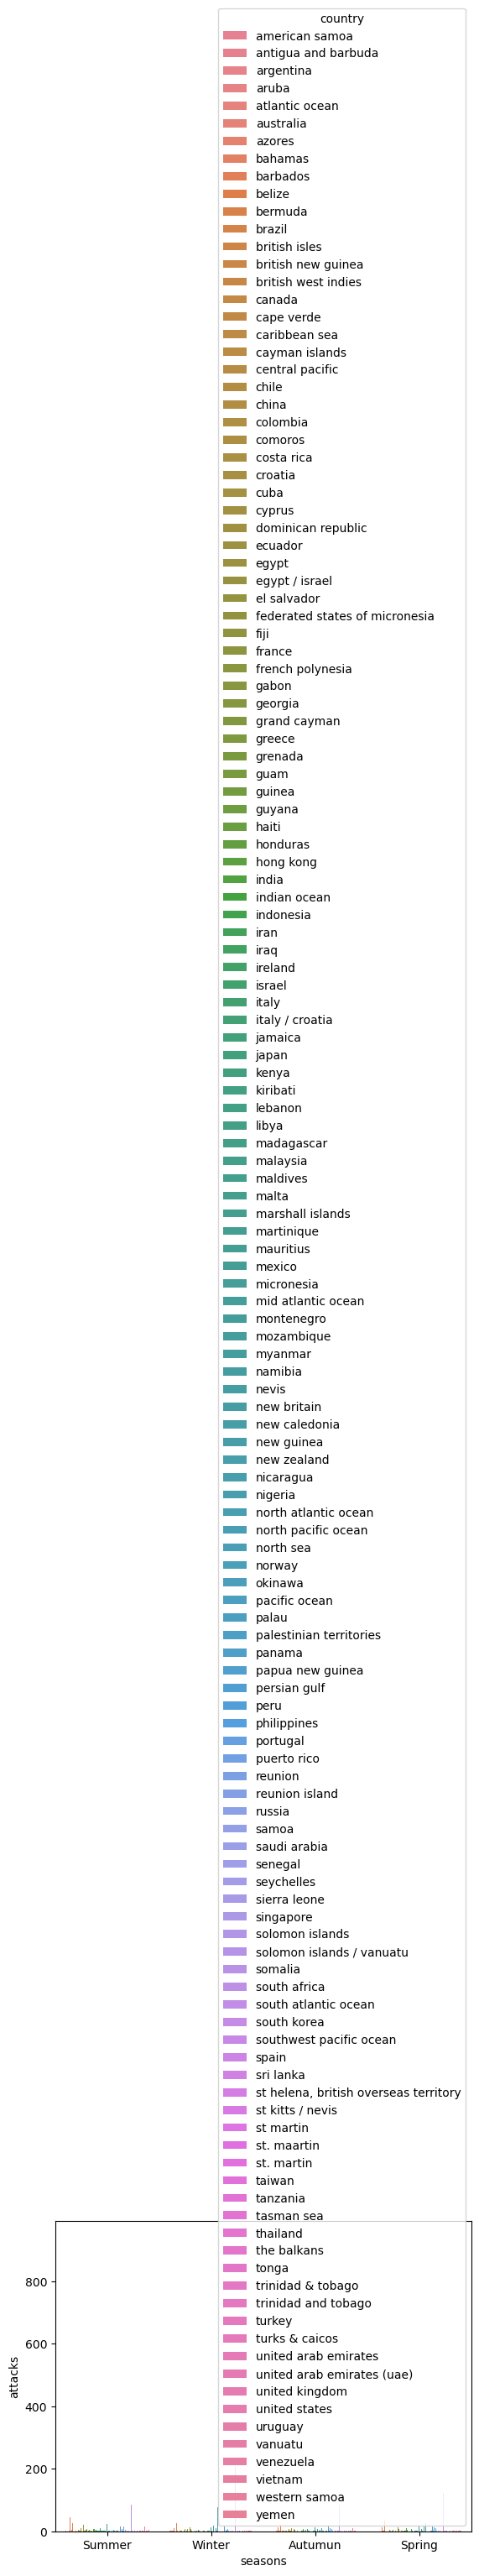

In [185]:
sns.barplot(y="attacks", x="seasons", hue="country", data=df_attacks_general)
plt.show()

In [187]:
ataques_por_pais= shark_13_df.groupby("country")["attacks"].sum()
ataques_por_pais

country
american samoa         3
antigua and barbuda    1
argentina              1
aruba                  1
atlantic ocean         2
                      ..
vanuatu                6
venezuela              5
vietnam                8
western samoa          1
yemen                  5
Name: attacks, Length: 142, dtype: int64

In [189]:
paises_mas_ataques = ataques_por_pais.nlargest(5)
paises_mas_ataques

country
united states    2155
australia        1221
south africa      500
new zealand       117
brazil            104
Name: attacks, dtype: int64

In [191]:
paises_menos_ataques = ataques_por_pais.nsmallest(5)
paises_menos_ataques

country
antigua and barbuda    1
argentina              1
aruba                  1
british isles          1
british new guinea     1
Name: attacks, dtype: int64

In [195]:
import seaborn as sns 
import matplotlib.pyplot as plt

# Crear el gráfico de barras 
plt.figure(figsize=(10, 6)) 
sns.barplot(data=paises_mas_ataques, x='country', y='attacks', hue='seasons', ci=None) 
# Personalizar el gráfico 
plt.title('Top 5 Países con Más Ataques de Tiburones por Temporada') 
plt.xlabel('País') 
plt.ylabel('Número de Ataques') 
plt.legend(title='Temporada') 
plt.show()

C:\Users\dalmi\AppData\Local\Temp\ipykernel_15492\1259313241.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=paises_mas_ataques, x='country', y='attacks', hue='seasons', ci=None)


TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Figure size 1000x600 with 0 Axes>